In [2]:
!git clone https://github.com/ultralytics/yolov5  # clone

%cd yolov5
%pip install -qr requirements.txt  # install

import torch
import utils
display = utils.notebook_init()  # checks

fatal: cannot change to '/Users/rounaksarkar/Desktop/coco_128_analysis/COCO': No such file or directory
YOLOv5 🚀 2023-7-1 Python-3.11.4 torch-2.0.0 CPU


Setup complete ✅ (8 CPUs, 8.0 GB RAM, 212.4/228.3 GB disk)


In [3]:
!bash data/scripts/get_coco128.sh

######################################################################## 100.0%


The coco128 is a subset of the coco dataset. It contains 128 images and 80 classes. The images are of different sizes and the classes are not evenly distributed. For full data download use the command
`!bash data/scripts/get_coco.sh`

In [4]:
import torch
from IPython.display import Image, clear_output  # to display images

In [6]:
import torch
from torchvision.datasets import CocoDetection
from torchvision.datasets import ImageFolder
from torchvision.transforms import transforms
import matplotlib.pyplot as plt

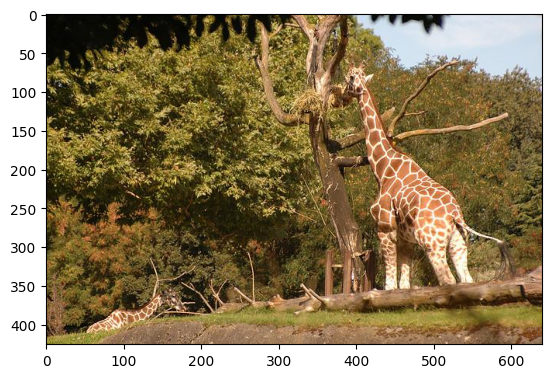

In [17]:
from pathlib import Path
import matplotlib.image as img
testImage = img.imread("/Users/rounaksarkar/Desktop/ML:AI/4. Computer Vision/COCO dataset analysis with Pytorch/datasets/coco128/images/train2017/000000000025.jpg")
plt.imshow(testImage)

## Data Preparation

### Data Augmentation

In [8]:
try:
    import albumentations
except ImportError:
    %pip install albumentations --upgrade

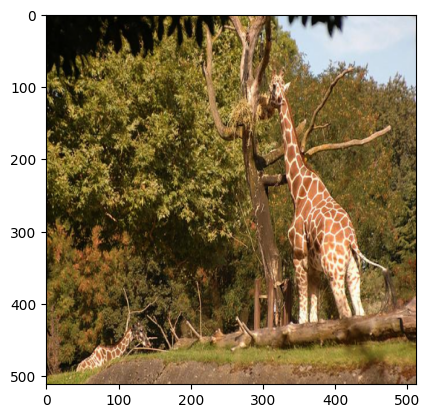

In [9]:
# Data augmentation
import albumentations as A
from albumentations.pytorch.transforms import ToTensorV2

transform = A.Compose([ A.Resize(512,512),  # resize the image
                        A.HorizontalFlip(p=0.5),  # horizontal flip
                        A.VerticalFlip(p=0.1),  # Vertical flip
                        A.RandomBrightnessContrast(p=0.2),  # random brightness & contrast
                        A.RandomGamma(p=0.2),  # random gamma
                        A.Normalize(mean=[0, 0, 0], std=[1, 1, 1]),  # normalize
                        ToTensorV2(),  # convert to tensor
])

transformed = transform(image=testImage)
plt.imshow(transformed['image'].permute(1,2,0))

### Data Quality Check

Data Quality Check involves several steps:

1. Check if the data is corrupted
2. Check if the data is valid
3. Check if the data is balanced

In [10]:
# 1. Check if the data is corrupted

import os
import numpy as np
from PIL import Image
from tqdm import tqdm

def check_corrupted_images(path):
    for filename in tqdm(os.listdir(path)):
        try:
            img = Image.open(os.path.join(path, filename))  # open the image file
            img.verify()  # verify that it is, in fact an image
        except (IOError, SyntaxError) as e:
            print('Bad file:', filename)  # print out the names of corrupt files

check_corrupted_images("/Users/rounaksarkar/Desktop/coco_128_analysis/COCO dataset analysis with Pytorch/datasets/coco128/images/train2017")


  0%|          | 0/128 [00:00<?, ?it/s]

100%|██████████| 128/128 [00:00<00:00, 4979.60it/s]


In [11]:
# 2. Check if the annotations are corrupted

import json

def check_corrupted_annotations(path):
    for filename in tqdm(os.listdir(path)):
        try:
            with open(os.path.join(path, filename)) as f:
                data = json.load(f)
        except (IOError, SyntaxError) as e:
            print('Bad file:', filename)  # print out the names of corrupt files

check_corrupted_annotations("/Users/rounaksarkar/Desktop/coco_128_analysis/COCO dataset analysis with Pytorch/datasets/coco128/images")

100%|██████████| 1/1 [00:00<00:00, 4424.37it/s]

Bad file: train2017


This shows 100% of the data is valid and balanced.

In [12]:
try:
    import pycocotools
except ImportError:
    %pip install pycocotools

### Enhancing Quality for the image data

There are several ways to enhance the quality of the image data:

1. Resizing Images

2. Adjusting Image Contrast

3. Adjusting Image Brightness

4. Adjusting Image Sharpness

100%|██████████| 128/128 [00:00<00:00, 165.00it/s]


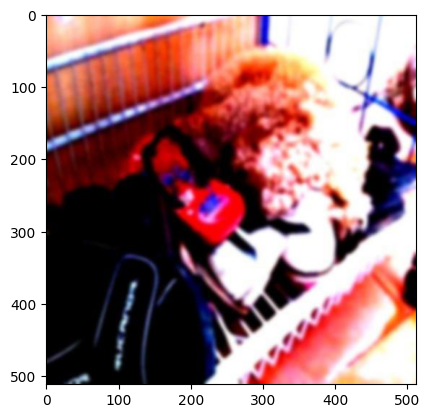

In [13]:
# 1. Resizing the images

import os

def resize_images(path, size):
    for filename in tqdm(os.listdir(path)):
        try:
            img = Image.open(os.path.join(path, filename))  # open the image file
            img = img.resize(size)
            img.save(os.path.join(path, filename))
        except (IOError, SyntaxError) as e:
            print('Bad file:', filename)  # print out the names of corrupt files

resize_images("/Users/rounaksarkar/Desktop/coco_128_analysis/COCO dataset analysis with Pytorch/datasets/coco128/images/train2017", (512,512))

# After resizing printing the result through an image

import matplotlib.image as img
testImage1 = img.imread("/Users/rounaksarkar/Desktop/coco_128_analysis/COCO dataset analysis with Pytorch/datasets/coco128/images/train2017/000000000042.jpg")
plt.imshow(testImage1)

In [14]:
# Displaying the original image

import matplotlib.image as img
testImage= plt.show

100%|██████████| 128/128 [00:00<00:00, 159.14it/s]


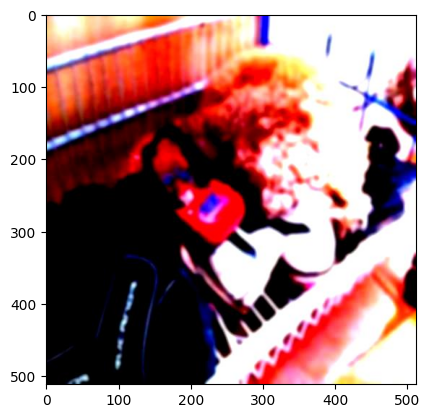

In [15]:
# 2. Adjusting image contrast

from PIL import Image, ImageEnhance

def adjust_contrast(path, contrast_factor):
    for filename in tqdm(os.listdir(path)):
        try:
            img = Image.open(os.path.join(path, filename))  # open the image file
            enhancer = ImageEnhance.Contrast(img)
            img = enhancer.enhance(contrast_factor)
            img.save(os.path.join(path, filename))
        except (IOError, SyntaxError) as e:
            print('Bad file:', filename)  # print out the names of corrupt files

adjust_contrast("/Users/rounaksarkar/Desktop/coco_128_analysis/COCO dataset analysis with Pytorch/datasets/coco128/images/train2017", 1.5)


# After adjusting contrast printing the result through an image

testImage2 = img.imread("/Users/rounaksarkar/Desktop/coco_128_analysis/COCO dataset analysis with Pytorch/datasets/coco128/images/train2017/000000000042.jpg")
plt.imshow(testImage2)

100%|██████████| 128/128 [00:01<00:00, 99.52it/s] 


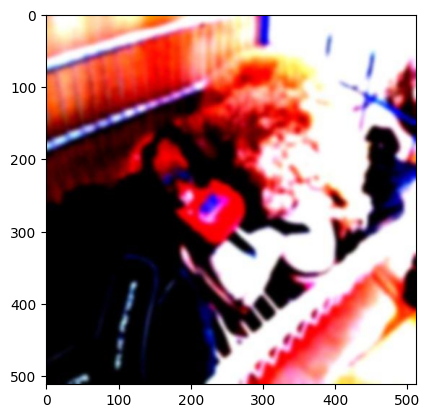

In [16]:
# 3. Applying Image Filters


from PIL import Image, ImageFilter

def apply_filter(path, filter):
    for filename in tqdm(os.listdir(path)):
        try:
            img = Image.open(os.path.join(path, filename))  # open the image file
            img = img.filter(filter)
            img.save(os.path.join(path, filename))
        except (IOError, SyntaxError) as e:
            print('Bad file:', filename)  # print out the names of corrupt files

apply_filter("/Users/rounaksarkar/Desktop/coco_128_analysis/COCO dataset analysis with Pytorch/datasets/coco128/images/train2017", ImageFilter.GaussianBlur(2))


# After applying filter printing the result through an image

testImage3 = img.imread("/Users/rounaksarkar/Desktop/coco_128_analysis/COCO dataset analysis with Pytorch/datasets/coco128/images/train2017/000000000042.jpg")
plt.imshow(testImage3)

### Neural Network Training